# Аналитика в авиакомпании

## Задачи исследования
1. выбрать топ-10 городов по количеству рейсов
2. построить графики: 
    - модели самолетов и количество рейсов, 
    - города и количество рейсов, 
    - топ-10 городов и количество рейсов
3. сделать выводы по каждому из графиков, пояснить результат

## Описание данных
__Dataset 1__:
    - model — модель самолета
    - flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

__Dataset 2__:
    - city — города
    - average_flights — среднее количестве рейсов, прибывающих в город city за день в августе 2018 года

### Шаг 1. Изучение данных

In [1]:
# настраиваем окружение
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from math import ceil
import seaborn as sns
import numpy as np
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#models = pd.read_csv('C:\\Y.Practikum\\project_5\\dataset\\query_1.csv', sep=',')
models = pd.read_csv('/datasets/query_1.csv', sep=',')

models.info()
models.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


Всего 8 записей, пропусков нет. Типы данных полей корректные.

In [3]:
#flights = pd.read_csv('C:\\Y.Practikum\\project_5\\dataset\\query_3.csv', sep=',')
flights = pd.read_csv('/datasets/query_3.csv', sep=',')

flights.info()
flights.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Всего 101 запись в наборе даных, пропусков нет, типы данных корректные.

### Исследование данных
1. выбрать топ-10 городов по количеству рейсов
2. построить графики: 
    - модели самолетов и количество рейсов, 
    - города и количество рейсов, 
    - топ-10 городов и количество рейсов
3. сделать выводы по каждому из графиков, пояснить результат

In [35]:
#  топ-10 городов по количеству рейсов
city_top10 = flights.sort_values(by='average_flights', ascending=False).head(10)
print(city_top10)

               city  average_flights
43           Москва       129.774194
70  Санкт-Петербург        31.161290
54      Новосибирск        17.322581
33       Красноярск        11.580645
20     Екатеринбург        11.322581
67   Ростов-на-Дону        10.193548
63            Пермь        10.129032
10           Брянск        10.000000
74             Сочи         9.612903
84        Ульяновск         9.580645


Москва и СПБ на первых местах в списке. Причем СПБ с заметным отставанием от Москвы по кол-ву рейсов.
По численности жителей города и области вокруг, т.е. Москва и Моск. область, намного больше любых других городов страны. Также в Москве находится наибольшее кол-во аэропортов, в том числе, международных, через которых транзитом летают многие рейсы. 

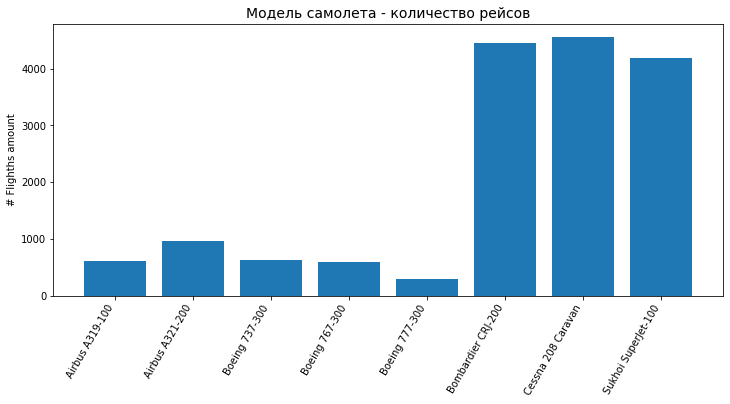

In [5]:
# график: модель самолета - количество рейсов
plt.figure(figsize=(12,5))
plt.bar(models['model'], models['flights_amount'])
plt.gca().set_xticklabels(models['model'], rotation=60, horizontalalignment= 'right')
plt.ylabel('# Flighths amount')
plt.title('Модель самолета - количество рейсов', fontsize=14)
plt.show()

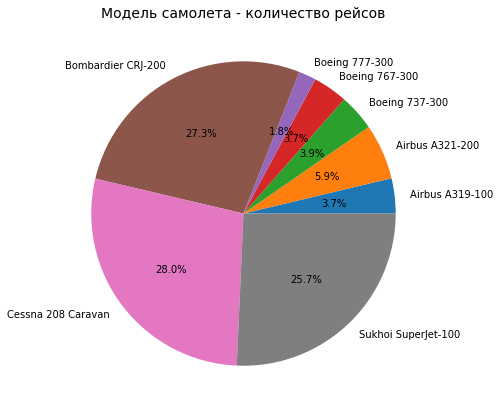

In [6]:
# Или тоже самое, но ввиде круговой диаграммы
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(models['flights_amount'], labels = models['model'], autopct='%1.1f%%')
plt.title('Модель самолета - количество рейсов', fontsize=14)

plt.show()

Малая и ближнемагистральная авиация (до 100 пассажиров) совершает существенно больше рейсов чем средне и дальнемагистральные самолеты.

In [9]:
# график "города и количество рейсов"
flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


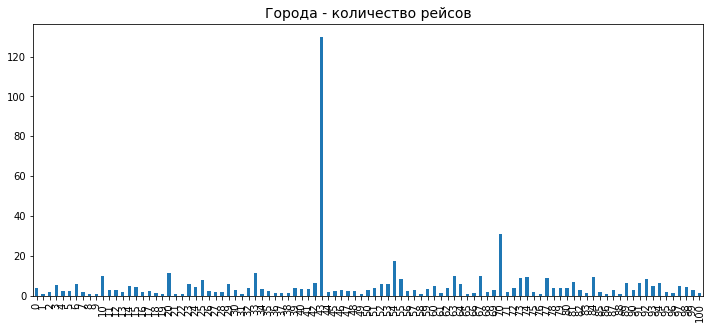

In [28]:
# График, в целом, тут не нужен. "describe" и так отражает общую картину
plt.figure(figsize=(12,5))
flights['average_flights'].plot(kind='bar')

plt.title('Города - количество рейсов', fontsize=14)
plt.show()

График, в данном случае, нужен только для наглядности отображения общей картины. Все выводы можно сделать по выводу команды describe.  
75% городов - это меньше 6-ти рейсов в день. И только несколько городов (Топ-10), в которых сосредоточено наибольшее кол-во рейсов.

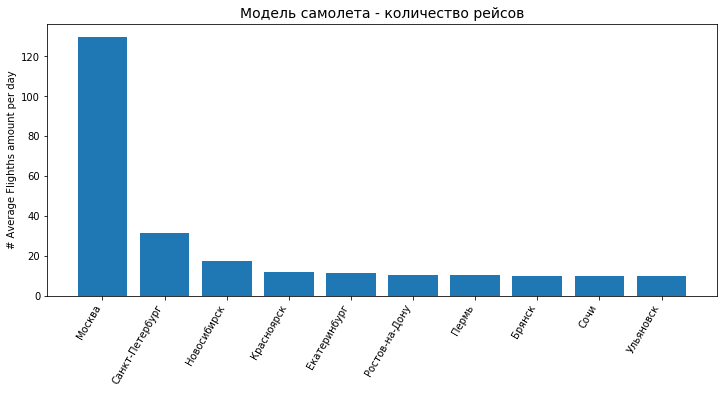

In [37]:
# график "топ-10 городов и количество рейсов"
city_top10

plt.figure(figsize=(12,5))
plt.bar(city_top10['city'], city_top10['average_flights'])
plt.gca().set_xticklabels(city_top10['city'], rotation=60, horizontalalignment= 'right')
plt.ylabel('# Average Flighths amount per day')
plt.title('Топ 10 городов - количество рейсов', fontsize=14)
plt.show()

График отображает, что все авиасообщение сосредоточено в 3-4 крупнейших городах страны. Также можно сделать вывод, что внутри страны авиасообщение развито слабо, т.к. большой трафик мы видим только в городах с международными аэропортами. В остальных городах, которые обслуживают внутренние рейсы, трафик значительно меньше.

### Вывод
1. Датасеты были изучены. Пропусков в данных и некорректных типов данных обнаружено не было.
2. Проведен анализ данных, построены графики.  

Выводы:
- Москва и СПБ на первых местах в списке Топ-10 городов по числу рейсов в день. Причем СПБ с заметным отставанием от Москвы по кол-ву рейсов. По численности жителей города и области вокруг, т.е. Москва и Моск. область, намного больше любых других городов страны. Также в Москве находится наибольшее кол-во аэропортов, в том числе, международных, через которых транзитом летают многие рейсы.
- Малая и ближнемагистральная авиация (до 100 пассажиров) совершает существенно больше рейсов чем средне и дальнемагистральные самолеты.
- Авиасообщение сосредоточено в 3-4 крупнейших городах страны. Также можно сделать вывод, что внутри страны авиасообщение развито слабо, т.к. большой трафик мы видим только в городах с международными аэропортами. В остальных городах, которые обслуживают внутренние рейсы, трафик значительно меньше.